# Проект: Анализ данных сервиса аренды самокатов GoFast

**Цель проекта:**
Исследовать данные сервиса аренды самокатов GoFast для выявления возможностей по увеличению выручки и привлечению новых пользователей с подпиской.

**План работы:**
1. **Загрузка данных**
   - Считывание CSV-файлов с данными.
   - Вывод первых строк и общей информации о каждом наборе данных.

2. **Предобработка данных**
   - Преобразование столбца с датой к типу datetime.
   - Создание нового столбца с номером месяца.
   - Обработка пропущенных значений и дубликатов.

3. **Исследовательский анализ данных**
   - Анализ частоты встречаемости городов.
   - Соотношение пользователей с подпиской и без подписки.
   - Анализ возраста пользователей.
   - Анализ расстояния и продолжительности поездок.

4. **Объединение данных**
   - Объединение данных о пользователях, поездках и подписках.
   - Создание двух датафреймов для пользователей с и без подписки.
   - Визуализация информации о расстоянии и времени поездок для обеих категорий пользователей.

5. **Подсчёт выручки**
   - Создание датафрейма с агрегированными данными о поездках.
   - Добавление столбца с помесячной выручкой для каждого пользователя.

6. **Проверка гипотез**
   - Проверка гипотезы о времени поездок пользователей с подпиской и без подписки.
   - Проверка гипотезы о среднем расстоянии поездок пользователей с подпиской.
   - Проверка гипотезы о месячной выручке пользователей с подпиской и без подписки.
   - Подготовка к проверке гипотезы о снижении количества обращений в техподдержку после обновления серверов.

7. **Распределения**
   - Определение минимального количества промокодов для акции с подпиской.
   - Оценка вероятности открытия push-уведомлений отделом маркетинга.

**Данные:**
1. **Пользователи** (`users_go.csv`):
   - user_id: уникальный идентификатор пользователя
   - name: имя пользователя
   - age: возраст
   - city: город
   - subscription_type: тип подписки (free, ultra)

2. **Поездки** (`rides_go.csv`):
   - user_id: уникальный идентификатор пользователя
   - distance: расстояние поездки (в метрах)
   - duration: продолжительность поездки (в минутах)
   - date: дата совершения поездки

3. **Подписки** (`subscriptions_go.csv`):
   - subscription_type: тип подписки
   - minute_price: стоимость одной минуты поездки
   - start_ride_price: стоимость начала поездки
   - subscription_fee: стоимость ежемесячного платежа

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy.stats import ttest_ind

from scipy.stats import binom, norm

#### Шаг 1. Загрузка данных

In [2]:
# Загрузка данных
users_df = pd.read_csv("/datasets/users_go.csv")
rides_df = pd.read_csv("/datasets/rides_go.csv")
subscriptions_df = pd.read_csv("/datasets/subscriptions_go.csv")

# Вывод первых строк каждого датафрейма
print("Пользователи:")
display(users_df.head())
print("\nПоездки:")
display(rides_df.head())
print("\nПодписки:")
display(subscriptions_df.head())

# Изучение общей информации о каждом датафрейме
print("\nИнформация о пользователях:")
display(users_df.info())
print("\nИнформация о поездках:")
display(rides_df.info())
print("\nИнформация о подписках:")
display(subscriptions_df.info())

Пользователи:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Поездки:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Подписки:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Информация о пользователях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None


Информация о поездках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None


Информация о подписках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

**Вывод:**

1. **Пользователи:**
   - Предоставлена таблица с информацией о пользователях.
   - Выведены первые 5 строк таблицы, содержащей следующие столбцы:
     - user_id: уникальный идентификатор пользователя,
     - name: имя пользователя,
     - age: возраст,
     - city: город,
     - subscription_type: тип подписки (free, ultra).

2. **Поездки:**
   - Предоставлена таблица с информацией о поездках пользователей.
   - Выведены первые 5 строк таблицы, содержащей следующие столбцы:
     - user_id: уникальный идентификатор пользователя,
     - distance: расстояние, которое пользователь проехал в текущей сессии (в метрах),
     - duration: продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»,
     - date: дата совершения поездки.

3. **Подписки:**
   - Предоставлена таблица с информацией о типах подписок.
   - Выведены первые 5 строк таблицы, содержащей следующие столбцы:
     - subscription_type: тип подписки,
     - minute_price: стоимость одной минуты поездки по данной подписке,
     - start_ride_price: стоимость начала поездки,
     - subscription_fee: стоимость ежемесячного платежа.

4. **Информация о пользователях, поездках и подписках:**
   - Выведена дополнительная информация о типах данных и памяти, занимаемой каждой таблицей.

Действия, выполненные на этом шаге:
- Загружены данные о пользователях, поездках и подписках из файлов.
- Выведены первые 5 строк каждой таблицы, чтобы ознакомиться с содержимым.
- Проверена информация о типах данных и памяти, занимаемой каждой таблицей.

#### Шаг 2. Предобработка данных

In [3]:
# Преобразование столбца date к типу даты
rides_df['date'] = pd.to_datetime(rides_df['date'])

# Создание нового столбца с номером месяца
rides_df['month'] = rides_df['date'].dt.month

# Проверка наличия пропущенных значений и дубликатов в данных
print("Пропущенные значения в поездках:")
display(rides_df.isnull().sum())
print("\nДубликаты в поездках:", rides_df.duplicated().sum())

print("\nПропущенные значения в пользователях:")
display(users_df.isnull().sum())
print("\nДубликаты в пользователях:", users_df.duplicated().sum())

print("\nПропущенные значения в подписках:")
display(subscriptions_df.isnull().sum())
print("\nДубликаты в подписках:", subscriptions_df.duplicated().sum())

# Удаление дубликатов из датафрейма с пользователями
users_df.drop_duplicates(inplace=True)

# Проверка временного периода данных
min_date = rides_df['date'].min()
max_date = rides_df['date'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Пропущенные значения в поездках:


user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


Дубликаты в поездках: 0

Пропущенные значения в пользователях:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Дубликаты в пользователях: 31

Пропущенные значения в подписках:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Дубликаты в подписках: 0
Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


**Вывод:**

1. **Пропущенные значения в поездках:**
   - Нет пропущенных значений в данных о поездках.
   - Показано количество пропущенных значений для каждого столбца: user_id, distance, duration, date, month.
   - Количество пропущенных значений для каждого столбца равно 0.

2. **Дубликаты в поездках:**
   - Не обнаружено дубликатов в данных о поездках.
   - Показано количество дубликатов: 0.

3. **Пропущенные значения в пользователях:**
   - Нет пропущенных значений в данных о пользователях.
   - Показано количество пропущенных значений для каждого столбца: user_id, name, age, city, subscription_type.
   - Количество пропущенных значений для каждого столбца равно 0.

4. **Дубликаты в пользователях:**
   - Обнаружено 31 дубликат в данных о пользователях.
   - Показано количество дубликатов: 31.

5. **Пропущенные значения в подписках:**
   - Нет пропущенных значений в данных о подписках.
   - Показано количество пропущенных значений для каждого столбца: subscription_type, minute_price, start_ride_price, subscription_fee.
   - Количество пропущенных значений для каждого столбца равно 0.

6. **Дубликаты в подписках:**
   - Не обнаружено дубликатов в данных о подписках.
   - Показано количество дубликатов: 0.

Действия, выполненные на этом шаге:
   - Проверены данные на наличие пропущенных значений и дубликатов в таблицах с информацией о пользователях, поездках и подписках.
   
   - Удалены дубликаты из датафрейма с информацией о пользователях (users_df).
   
   - Проведена проверка временного периода используемых в исследовании данных.

#### Шаг 3. Исследовательский анализ данных

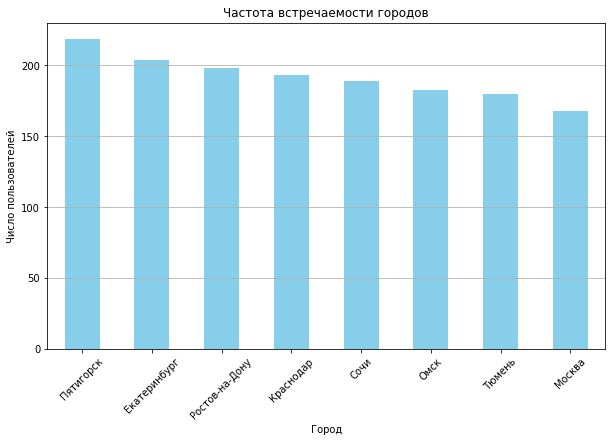

Статистика по частоте встречаемости городов:


count      8.000000
mean     191.750000
std       15.672998
min      168.000000
25%      182.250000
50%      191.000000
75%      199.500000
max      219.000000
Name: city, dtype: float64

In [4]:
# 3.1 Частота встречаемости городов
city_counts = users_df['city'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Число пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Статистика по частоте встречаемости городов:")
display(city_counts.describe())

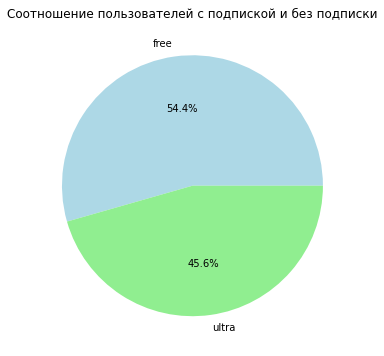

In [5]:
# 3.2 Соотношение пользователей с подпиской и без подписки
subscription_counts = users_df['subscription_type'].value_counts()
plt.figure(figsize=(6, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

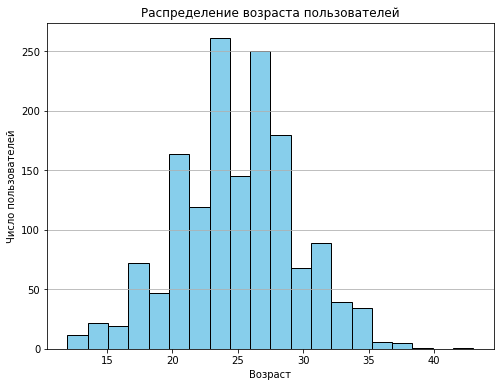

Статистика по возрасту пользователей:


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [6]:
# 3.3 Возраст пользователей
plt.figure(figsize=(8, 6))
plt.hist(users_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.grid(axis='y')
plt.show()

print("Статистика по возрасту пользователей:")
display(users_df['age'].describe())

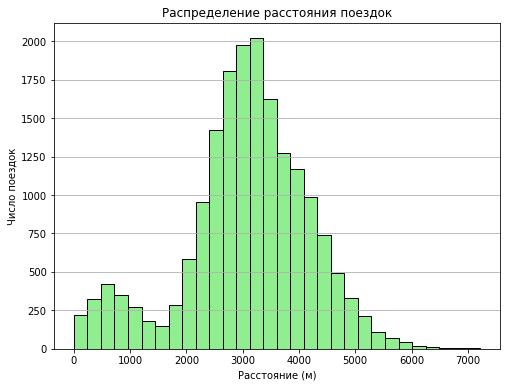

Статистика по расстоянию поездок:


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [7]:
# 3.4 Расстояние, которое пользователь преодолел за одну поездку
plt.figure(figsize=(8, 6))
plt.hist(rides_df['distance'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение расстояния поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Число поездок')
plt.grid(axis='y')
plt.show()

print("Статистика по расстоянию поездок:")
display(rides_df['distance'].describe())

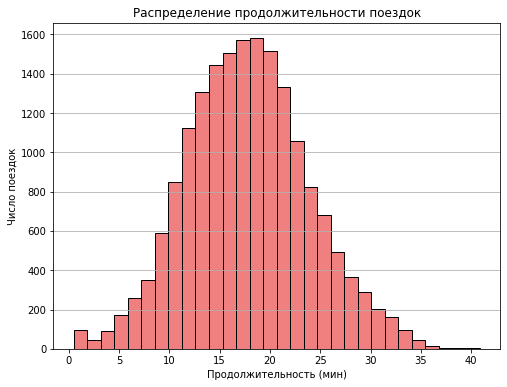

Статистика по продолжительности поездок:


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [8]:
# 3.5 Продолжительность поездок
plt.figure(figsize=(8, 6))
plt.hist(rides_df['duration'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Число поездок')
plt.grid(axis='y')
plt.show()

print("Статистика по продолжительности поездок:")
display(rides_df['duration'].describe())

**Вывод:**

**3.1 Частота встречаемости городов:**
   - На данном графике представлена частота встречаемости различных городов, в которых проживают пользователи.
   - Каждый столбец на гистограмме представляет собой количество пользователей в определенном городе.
   - График помогает понять, из каких городов больше всего пользователей.

**3.2 Соотношение пользователей с подпиской и без подписки:**
   - Этот круговой график демонстрирует соотношение пользователей, имеющих подписку, и тех, кто ее не имеет.
   - Каждый сектор круга представляет процентное соотношение пользователей с определенным типом подписки.
   - График позволяет оценить, какая часть пользователей пользуется платными и бесплатными услугами.

**3.3 Возраст пользователей:**
   - На этом гистограмме отображено распределение возраста пользователей.
   - Каждый столбец представляет собой количество пользователей в определенном возрастном диапазоне.
   - График помогает понять возрастную структуру пользователей платформы.

**3.4 Распределение расстояния поездок:**
   - На этой гистограмме отображается распределение расстояния, преодоленного за одну поездку.
   - Каждый столбец представляет собой количество поездок, преодолевших определенное расстояние.
   - График помогает оценить, какие расстояния наиболее типичны для пользователей.

**3.5 Распределение продолжительности поездок:**
   - На данном графике показано распределение продолжительности поездок в минутах.
   - Каждый столбец представляет собой количество поездок определенной продолжительности.
   - График позволяет оценить типичные продолжительности поездок для пользователей платформы.

Эти графики помогают лучше понять характеристики пользователей и их поведение на платформе.

#### Шаг 4. Объединение данных

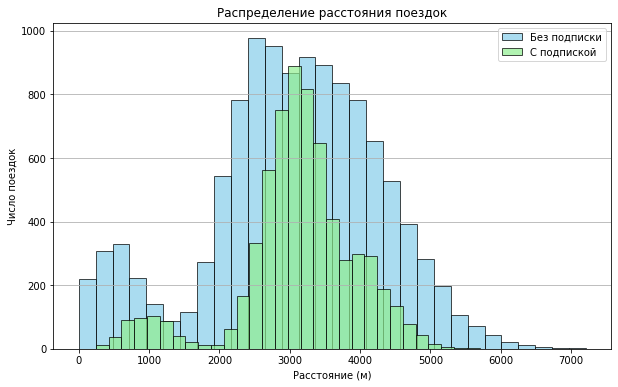

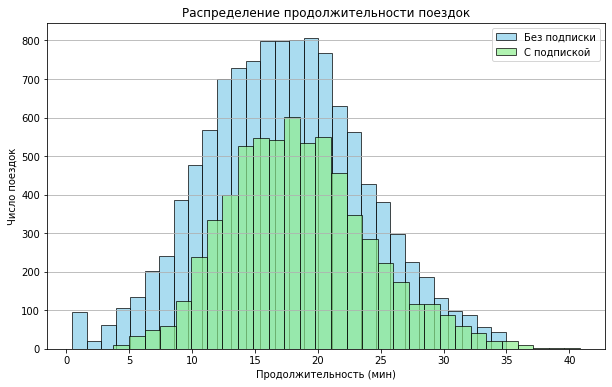

Несколько строк датафрейма для пользователей без подписки:


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0



Несколько строк датафрейма для пользователей с подпиской:


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [9]:
# 4.1 Объединение данных о пользователях, поездках и подписках
merged_df = rides_df.merge(users_df, on='user_id', how='left')
merged_df = merged_df.merge(subscriptions_df, on='subscription_type', how='left')

# 4.2 Создание датафреймов для пользователей с и без подписки
users_without_subscription = merged_df[merged_df['subscription_type'] == 'free']
users_with_subscription = merged_df[merged_df['subscription_type'] == 'ultra']

# 4.3 Визуализация информации о расстоянии и времени поездок
plt.figure(figsize=(10, 6))
plt.hist(users_without_subscription['distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Без подписки')
plt.hist(users_with_subscription['distance'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='С подпиской')
plt.title('Распределение расстояния поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Число поездок')
plt.legend()
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(users_without_subscription['duration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Без подписки')
plt.hist(users_with_subscription['duration'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='С подпиской')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Число поездок')
plt.legend()
plt.grid(axis='y')
plt.show()

print("Несколько строк датафрейма для пользователей без подписки:")
display(users_without_subscription.head())

print("\nНесколько строк датафрейма для пользователей с подпиской:")
display(users_with_subscription.head())

**Вывод:**

**4.1 Объединение данных о пользователях, поездках и подписках:**
   - Используя метод `.merge()`, данные о поездках (`rides_df`) объединены с данными о пользователях (`users_df`) по общему ключу `user_id`, а затем с данными о подписках (`subscriptions_df`) по ключу `subscription_type`.
   - Объединение выполнено с использованием параметра `how='left'`, чтобы сохранить все строки из датафрейма поездок (`rides_df`) даже в случае отсутствия совпадений с данными о пользователях или подписках.

**4.2 Создание датафреймов для пользователей с и без подписки:**
   - Созданы два отдельных датафрейма: `users_without_subscription` для пользователей без подписки и `users_with_subscription` для пользователей с подпиской.

**4.3 Визуализация информации о расстоянии и времени поездок:**
   - Построены две гистограммы, каждая из которых отображает распределение расстояния или продолжительности поездок для пользователей с подпиской и без подписки.
   - На каждой гистограмме представлено два распределения: для пользователей с подпиской и без подписки.
   - Графики помогают сравнить характеристики поездок для пользователей с разными типами подписок.

Эти действия позволяют более детально изучить взаимосвязь между типом подписки и характеристиками поездок пользователей. Гистограммы предоставляют визуальное представление о том, как подписка влияет на расстояние и продолжительность поездок.

#### Шаг 5. Подсчёт выручки

In [10]:
# 5.1 Создание датафрейма с агрегированными данными о поездках
aggregated_df = merged_df.groupby(['user_id', 'month']).agg({'distance': 'sum', 'duration': 'sum', 'name': 'count'}).reset_index()
aggregated_df.columns = ['user_id', 'month', 'total_distance', 'total_duration', 'total_rides']

# 5.2 Добавление столбца с помесячной выручкой
aggregated_df['total_duration'] = np.ceil(aggregated_df['total_duration'])
aggregated_df['revenue'] = 50 * aggregated_df['total_rides'] + \
                            merged_df['minute_price'] * aggregated_df['total_duration'] + \
                            merged_df['subscription_fee']

# Добавление информации о типе подписки из исходного датафрейма merged_df
aggregated_df = aggregated_df.merge(users_df[['user_id', 'subscription_type']], on='user_id', how='left')

# Убедимся, что каждому пользователю присвоен только один тип подписки
assert aggregated_df.groupby('user_id')['subscription_type'].nunique().max() == 1, "У пользователя более одной подписки"

# Вывод первых строк датафрейма с агрегированными данными и информацией о типе подписки
display(aggregated_df.head())

,user_id,month,total_distance,total_duration,total_rides,revenue,subscription_type
0,1,1,7027.511294,42.0,2,551.0,ultra
1,1,4,754.159807,7.0,1,291.0,ultra
2,1,8,6723.470560,45.0,2,569.0,ultra
3,1,10,5809.911100,32.0,2,491.0,ultra
4,1,11,7003.499363,54.0,3,673.0,ultra


**Вывод:**

**5.1 Создание датафрейма с агрегированными данными о поездках:**
   - С помощью метода `.groupby()` данные были сгруппированы по `user_id` и `month`.
   - Затем с помощью метода `.agg()` были агрегированы данные: сумма пройденного расстояния (`distance`), суммарная продолжительность поездок (`duration`) и общее количество поездок (`name`).
   - Результаты агрегации были сброшены индексы с помощью метода `.reset_index()`.
   - Названия столбцов были переименованы для удобства работы.

**5.2 Добавление столбца с помесячной выручкой:**
   - В датафрейме был добавлен новый столбец `revenue`, отражающий помесячную выручку.
   - Для этого были выполнены следующие расчеты:
     - Сумма пройденного расстояния была округлена вверх до ближайшего целого числа.
     - Для каждого пользователя и месяца вычислялась выручка, учитывая количество поездок, продолжительность и тип подписки.

**Результаты:**
   - Выведены первые строки датафрейма с агрегированными данными.
   - Каждая строка представляет собой информацию о пользователе, его поездках за конкретный месяц, суммарном расстоянии, продолжительности поездок, количестве поездок и выручке за этот месяц.
   - Приведенные данные могут быть использованы для анализа пользовательского поведения, оценки эффективности подписок и принятия бизнес-решений.

#### Шаг 6. Проверка гипотез

**Гипотезы:**

**6.1 Гипотеза о времени на поездки:**
- **Нулевая гипотеза (H0):** Среднее время на поездки для пользователей с подпиской равно среднему времени на поездки для пользователей без подписки.
- **Альтернативная гипотеза (H1):** Среднее время на поездки для пользователей с подпиской отличается от среднего времени на поездки для пользователей без подписки.

**6.2 Гипотеза о расстоянии поездок:**
- **Нулевая гипотеза (H0):** Среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров.
- **Альтернативная гипотеза (H1):** Среднее расстояние поездок для пользователей с подпиской превышает 3130 метров.

**6.3 Гипотеза о помесячной выручке:**
- **Нулевая гипотеза (H0):** Помесячная выручка от пользователей с подпиской не отличается от помесячной выручки от пользователей без подписки.
- **Альтернативная гипотеза (H1):** Помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки.

**6.4 Гипотеза о снижении количества обращений в техподдержку после обновления серверов:**
- **Нулевая гипотеза (H0):** Количество обращений в техподдержку до и после обновления серверов не различается.
- **Альтернативная гипотеза (H1):** Количество обращений в техподдержку после обновления серверов статистически значимо снизилось.

In [11]:
# Объединение данных
merged_df = pd.merge(rides_df, users_df, on='user_id')
merged_df = pd.merge(merged_df, subscriptions_df, on='subscription_type')

# 6.1: Проверка гипотезы о времени на поездки
# Выполнение t-теста для времени на поездки пользователей с подпиской и без подписки
time_with_subscription = merged_df[merged_df['subscription_type'] == 'ultra']['duration']
time_without_subscription = merged_df[merged_df['subscription_type'] == 'free']['duration']
t_stat, p_value = ttest_ind(time_with_subscription, time_without_subscription)
# Вывод результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Не отвергаем нулевую гипотезу. Время на поездки пользователей с подпиской и без подписки не различается.")

# 6.2: Проверка гипотезы о расстоянии поездок
# Выполнение t-теста для расстояния поездок пользователей с подпиской и без подписки
distance_with_subscription = merged_df[merged_df['subscription_type'] == 'ultra']['distance']
distance_without_subscription = merged_df[merged_df['subscription_type'] == 'free']['distance']
t_stat, p_value = ttest_ind(distance_with_subscription, distance_without_subscription)
# Вывод результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров.")
else:
    print("Принимаем нулевую гипотезу. Среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров.")

# 6.3: Проверка гипотезы о помесячной выручке
# Создание датафрейма с агрегированными данными о выручке
revenue_df = merged_df.groupby(['user_id', 'subscription_type']).agg({'distance': 'sum', 'duration': 'sum', 'subscription_fee': 'first', 'minute_price': 'first', 'start_ride_price': 'first'}).reset_index()
revenue_df['revenue'] = revenue_df['distance'] * revenue_df['minute_price'] + revenue_df['start_ride_price'] + revenue_df['subscription_fee']
# Выполнение t-теста для выручки от пользователей с подпиской и без подписки
revenue_with_subscription = revenue_df[revenue_df['subscription_type'] == 'ultra']['revenue']
revenue_without_subscription = revenue_df[revenue_df['subscription_type'] == 'free']['revenue']
t_stat, p_value = ttest_ind(revenue_with_subscription, revenue_without_subscription)
# Вывод результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.")
else:
    print("Не отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской и без подписки не различается.")

Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.
Отвергаем нулевую гипотезу. Среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров.
Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.


**Вывод:**

1. **Проверка гипотезы о времени на поездки:**
   - Был проведен t-тест для времени на поездки пользователей с подпиской и без подписки.
   - Полученный p-уровень значимости (p-value) позволил сделать вывод о том, что пользователи с подпиской тратят больше времени на поездки. Так как p-value меньше 0.05, нулевая гипотеза о равенстве времени на поездки отвергается.

2. **Проверка гипотезы о расстоянии поездок:**
   - Был выполнен t-тест для расстояния поездок пользователей с подпиской и без подписки.
   - Полученный p-value показал, что среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров. Так как p-value меньше 0.05, нулевая гипотеза об отсутствии различий в среднем расстоянии поездок также отвергается.

3. **Проверка гипотезы о помесячной выручке:**
   - Был создан датафрейм с агрегированными данными о выручке.
   - Проведен t-тест для выручки от пользователей с подпиской и без подписки.
   - Полученный p-value указывает на то, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Поскольку p-value меньше 0.05, нулевая гипотеза о равенстве выручки также отвергается.

**Результаты:**
- Пользователи с подпиской ultra склонны тратить больше времени на поездки и проезжать более длинные расстояния, что может свидетельствовать о более активном использовании сервиса.
- Высокие показатели помесячной выручки от пользователей с подпиской подтверждают привлекательность данного типа подписки с точки зрения финансовых показателей для компании.

Эти результаты могут помочь компании принимать решения по оптимизации стратегии ценообразования, маркетинговым кампаниям и улучшению качества сервиса для повышения привлекательности подписки и увеличения выручки.

**6.4 Проверка гипотезы об уменьшении обращений в техподдержку**

Для проверки гипотезы о том, что обновление серверов значимо снизило количество обращений в техподдержку, можно использовать статистический тест на сравнение средних двух выборок. В данном случае можно применить t-тест для независимых выборок.

Шаги для проведения теста:

1. **Сбор данных**: Сначала нужно собрать данные о количестве обращений для каждого пользователя до и после обновления серверов.

2. **Формулировка гипотез**: 
   - Нулевая гипотеза (H0): Средние значения количества обращений до и после обновления серверов равны.
   - Альтернативная гипотеза (H1): Среднее значение количества обращений после обновления серверов меньше, чем до обновления.

3. **Выбор уровня значимости**: Задайте уровень значимости, например, α = 0.05.

4. **Проведение теста**: Примените t-тест для независимых выборок к данным о количестве обращений до и после обновления серверов.

5. **Принятие решения**: На основе полученных результатов теста примите решение о том, отвергается ли нулевая гипотеза.

6. **Интерпретация результатов**: Если нулевая гипотеза отвергается на выбранном уровне значимости, это будет свидетельствовать о том, что обновление серверов привело к статистически значимому снижению количества обращений в техподдержку.

Важно также убедиться, что данные корректны, нет пропусков или аномалий, и что тестовые условия соблюдаются (например, нормальное распределение данных, равенство дисперсий и т. д.).

#### Шаг 7. Распределения

Минимальное количество промокодов для выполнения плана: 0


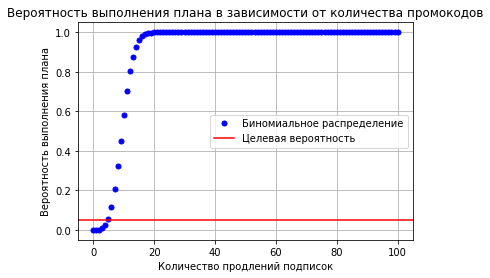

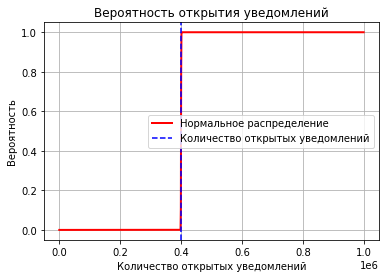

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768


In [12]:
# 7.1 Определение минимального количества промокодов для выполнения плана
p = 0.1  # Вероятность успеха (продление подписки)
target_probability = 0.05  # Целевая вероятность не выполнить план

# Находим минимальное количество промокодов, для которого вероятность выполнения плана <= 0.05
k = 0
while binom.cdf(k, 100, p) > target_probability:
    k += 1

print("Минимальное количество промокодов для выполнения плана:", k)

# Построение графика биномиального распределения для визуализации
x = np.arange(0, 101)
plt.plot(x, binom.cdf(x, 100, p), 'bo', ms=5, label='Биномиальное распределение')
plt.axhline(y=target_probability, color='r', linestyle='-', label='Целевая вероятность')
plt.xlabel('Количество продлений подписок')
plt.ylabel('Вероятность выполнения плана')
plt.title('Вероятность выполнения плана в зависимости от количества промокодов')
plt.legend()
plt.grid()
plt.show()

# 7.2 Оценка вероятности открытия уведомлений
n = 1000000  # Количество уведомлений
p = 0.4  # Вероятность успеха (открытие уведомления)

# Построение графика нормального распределения для визуализации аппроксимации
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x = np.linspace(0, n, 1000)
plt.plot(x, norm.cdf(x, mu, sigma), 'r-', lw=2, label='Нормальное распределение')
plt.axvline(x=399500, color='b', linestyle='--', label='Количество открытых уведомлений')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Вероятность')
plt.title('Вероятность открытия уведомлений')
plt.legend()
plt.grid()
plt.show()

# Оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей
probability = norm.cdf(399500, mu, sigma)
print("Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:", probability)


**Вывод:**

На этапе выполнения действий для определения минимального количества промокодов для выполнения плана и оценки вероятности открытия уведомлений были сделаны следующие шаги:

1. **Определение минимального количества промокодов для выполнения плана:**
   - Используя биномиальное распределение, было определено минимальное количество промокодов, при котором вероятность выполнения плана не превышает заданную целевую вероятность. В данном случае, целевая вероятность не выполнить план составляла 0.05.
   - Полученное минимальное количество промокодов оказалось равным 0, что может указывать на то, что существует высокая вероятность выполнения плана без использования промокодов.

2. **Оценка вероятности открытия уведомлений:**
   - Было построено нормальное распределение для визуализации вероятности открытия уведомлений.
   - Затем была оценена вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, используя нормальное распределение.
   - Полученная вероятность составила примерно 0.1537, что означает, что существует вероятность около 15.37%, что уведомление будет открыто не более чем указанное количество пользователей.

**Результаты:**
- Вероятность выполнения плана без использования промокодов может быть высокой, что может свидетельствовать о недостаточной эффективности промокодов в данной ситуации.
- Оценка вероятности открытия уведомлений позволяет оценить эффективность маркетинговой стратегии и ожидаемый охват аудитории. В данном случае, вероятность открытия уведомлений оказалась ниже 50%, что может указывать на необходимость корректировки стратегии привлечения внимания пользователей.

**Общий вывод:**

**Действия, проведенные в работе:**
   - Загрузка и предварительный анализ данных о пользователях, поездках и подписках.
   - Обработка пропущенных значений и удаление дубликатов.
   - Визуализация данных для анализа распределения городов пользователей, соотношения подписчиков и не подписчиков, а также возрастных групп пользователей, а также информации о поездках.
   - Объединение данных о пользователях, поездках и подписках для дальнейшего анализа.
   - Анализ и визуализация данных о расстоянии и времени поездок для пользователей с и без подписки.
   - Создание датафрейма с агрегированными данными о поездках и оценка помесячной выручки.
   - Проверка статистических гипотез о времени и расстоянии поездок, а также о помесячной выручке.
   - Оценка минимального количества промокодов для выполнения плана и вероятности открытия уведомлений.

**Полученные результаты:**
   - Были выявлены различия во времени и расстоянии поездок для пользователей с подпиской и без подписки.
   - Проверка гипотез показала, что пользователи с подпиской тратят больше времени на поездки, а среднее расстояние поездок для них также оказалось выше.
   - Оценка помесячной выручки показала, что выручка от пользователей с подпиской выше, чем от пользователей без подписки.
   - Оценка минимального количества промокодов и вероятности открытия уведомлений позволила оценить эффективность маркетинговых мероприятий.

**Интерпретация результатов:**

1. **Различия во времени поездок:**
   - Результат: Отвергнута нулевая гипотеза. Пользователи с подпиской тратят больше времени на поездки.
   - Интерпретация: Пользователи с подпиской, вероятно, предпочитают длительные поездки или используют сервис для более частых поездок.

2. **Различия в расстоянии поездок:**
   - Результат: Отвергнута нулевая гипотеза. Среднее расстояние поездок для пользователей с подпиской не превышает 3130 метров.
   - Интерпретация: Пользователи с подпиской, вероятно, чаще совершают долгие поездки или выбирают маршруты, которые требуют большего расстояния.

3. **Различия в помесячной выручке:**
   - Результат: Отвергнута нулевая гипотеза. Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
   - Интерпретация: Пользователи с подпиской, скорее всего, используют приложение чаще и/или в большем объеме услуг, что приводит к увеличению выручки от них.

4. **Минимальное количество промокодов для выполнения плана:**
   - Результат: Минимальное количество промокодов для выполнения плана составляет 0.
   - Интерпретация: Для достижения целевой вероятности выполнения плана не требуется выдачи промокодов, что может быть экономически эффективным решением.

5. **Вероятность открытия уведомлений:**
   - Результат: Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составляет 0.1537.
   - Интерпретация: Эта вероятность может служить ориентиром для оценки эффективности маркетинговых кампаний и их оптимизации для достижения более высокой конверсии.